In [2]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
## Environment
# Change main system path to be able to run code from src folder
import sys
p = sys.path[0]
# Mac OS
if sys.path[0].endswith('/models'):
    main_path = p[:-len('/models')]
sys.path[0] = main_path

import os, gc
from termcolor import colored
import pandas as pd
from src import config

In [4]:
include_val_loss = True
include_sam = False

In [5]:
if include_val_loss:
    cvloss_files = [each for each in os.listdir(config.MODELS_DIR) if (each.endswith('_cvloss.csv') | 
                                                                    each.endswith('_Vloss.csv'))]
else:
    cvloss_files = [each for each in os.listdir(config.MODELS_DIR) if (each.endswith('_cvloss.csv'))]
    
print(len(cvloss_files))

165


In [6]:
model_summary = pd.DataFrame()
for i in cvloss_files:
    df = pd.read_csv(os.path.join(config.MODELS_DIR, i), index_col='target')
    model_summary = pd.concat([model_summary, df], axis=1)

target_labels_list = model_summary.index.tolist()

model_sum = model_summary.T.copy()
model_sum['overall'] = model_sum.mean(axis=1)

In [7]:
from collections import Counter
cnt = Counter(model_sum.index)
for i in cnt:
    if cnt[i] > 1:
        print(i)

In [8]:
MODEL_NAME = 'fts_mra_tempmz_slope_XGB'
model_sum[model_sum.index.isin([i for i in model_sum.index if i.startswith(MODEL_NAME)])]

target,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide,overall
fts_mra_tempmz_slope_XGB_opt_trvl_sfm_V,0.009969,0.009163,0.011615,0.020718,0.001745,0.011206,0.019721,0.011079,0.011958,0.005387,0.011256
fts_mra_tempmz_slope_XGB_opt_trvl_sfm,0.158230,0.088487,0.170999,0.208950,0.014049,0.159257,0.234982,0.183037,0.173149,0.081225,0.147236
fts_mra_tempmz_slope_XGB_opt_tr_sfm,0.191178,0.108804,0.207700,0.220018,0.025980,0.177872,0.245376,0.233179,0.184260,0.067537,0.166190
fts_mra_tempmz_slope_XGB_opt_tr_sfm_V,0.122569,0.093228,0.187465,0.301150,0.010862,0.148234,0.243995,0.152138,0.207704,0.071074,0.153842


In [9]:
# Extract text after model algo
combos = []
model_algo = ['_XGB_opt_', '_LR_reg_']
for m in model_algo:
    for i in model_sum.index:
        try:
            s = i.split(m)[1]
            combos.append(s)
        except: pass
set(combos)

{'tr', 'trV', 'tr_sfm', 'tr_sfm_V', 'trvl', 'trvlV', 'trvl_sfm', 'trvl_sfm_V'}

In [10]:
# TR VLOSS - trV + tr_sfm_V
MODELS = [i for i in model_sum.index if ((i.endswith('_trV') | (i.endswith('tr_sfm_V'))))]
# Get the selected models from model_sum
ms = model_sum[model_sum.index.isin(MODELS)].copy()#.sort_index()
ms[ms.index.isin([i for i in ms.index if not i.startswith('ens_')])].sort_values(by='overall')\
             .style.highlight_min(axis=0, 
                                  props='color:darkblue; background-color:lightblue;',
                                  subset=target_labels_list)\
                    .highlight_min(axis=0, 
                                   props='color:white; background-color:red;',
                                   subset=['overall'])

target,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide,overall
fts_mra_tempmz_slope_cntpk_spectra_range_mass_XGB_opt_tr_sfm_V,0.137285,0.113501,0.203013,0.268111,0.014050,0.126300,0.216751,0.154964,0.207013,0.067218,0.150821
fts_mra_tempmz_slope_cntpk_spectra_range_XGB_opt_tr_sfm_V,0.136611,0.111900,0.198250,0.267620,0.014050,0.129235,0.225709,0.156389,0.214349,0.066987,0.152110
fts_mra_tempmz_maxabun_XGB_opt_tr_sfm_V,0.136830,0.078433,0.189641,0.295211,0.013355,0.144483,0.240251,0.156247,0.207820,0.071465,0.153374
fts_mra_tempmz_instr_XGB_opt_tr_sfm_V,0.124693,0.093228,0.184128,0.301367,0.010862,0.146088,0.243995,0.152138,0.208283,0.071074,0.153585
fts_mra_tempmz_slope_XGB_opt_tr_sfm_V,0.122569,0.093228,0.187465,0.301150,0.010862,0.148234,0.243995,0.152138,0.207704,0.071074,0.153842
fts_mra_tempmz_XGB_opt_tr_sfm_V,0.124693,0.093228,0.184128,0.301367,0.010862,0.148849,0.243995,0.152138,0.208283,0.071074,0.153861
fts_mra_tempmz_slope_lrcorrmz4_XGB_opt_tr_sfm_V,0.132727,0.092817,0.193753,0.307477,0.010862,0.146873,0.256996,0.150288,0.205279,0.073758,0.157083
fts_mra_tempmz_slope_cntpk_spectra_XGB_opt_trV,0.128634,0.109709,0.205300,0.271730,0.015706,0.150182,0.231591,0.163154,0.228184,0.072633,0.157682
fts_mra_tempmz_slope_spectra_XGB_opt_tr_sfm_V,0.136917,0.082143,0.188860,0.297070,0.016073,0.149811,0.249013,0.149698,0.236784,0.071606,0.157798
fts_mra_tempmz_slope_spectra_mzstats_XGB_opt_tr_sfm_V,0.127563,0.120263,0.208697,0.270131,0.012627,0.168711,0.267570,0.158083,0.198834,0.061876,0.159435


In [11]:
# TR CVLOSS - tr + tr_sfm
if not include_sam:
    model_sumTR = model_sum[model_sum.index.isin([i for i in model_sum.index if not i.endswith('_sam')])]
model_sumTR = model_sum[model_sum.index.isin([i for i in model_sum.index if ((i.endswith('tr_sfm') | (i.endswith('tr'))))])]
#model_sum = model_sum[model_sum.index.isin([i for i in model_sum.index if not (i.endswith('_trvl_sfm') | i.endswith('_trvl'))])]
model_sumTR.sort_values(by='overall')\
             .style.highlight_min(axis=0, 
                                  props='color:darkblue; background-color:lightblue;',
                                  subset=target_labels_list)\
                    .highlight_min(axis=0, 
                                   props='color:white; background-color:red;',
                                   subset=['overall'])

target,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide,overall
fts_mra_tempmz_slope_cntpk_topmz_XGB_opt_tr_sfm,0.178072,0.108363,0.203343,0.232681,0.014417,0.138765,0.227415,0.226682,0.198478,0.066320,0.159454
fts_mra_tempmz_slope_cntpk_XGB_opt_tr_sfm,0.177574,0.114397,0.204482,0.230243,0.014417,0.138799,0.230109,0.221318,0.199734,0.066795,0.159787
fts_mra_tempmz_slope_cntpk_spectra_XGB_opt_tr_sfm,0.177500,0.121019,0.201595,0.230331,0.014898,0.142757,0.224134,0.226814,0.195055,0.063815,0.159792
fts_mra_tempmz_cntpk_XGB_opt_tr_sfm,0.187043,0.114397,0.199700,0.227437,0.014417,0.143612,0.230109,0.221318,0.202922,0.066795,0.160775
fts_mra_tempmz_slope_cntpk_spectra_lrcorrmz4_XGB_opt_tr_sfm,0.178948,0.122862,0.207070,0.228826,0.014898,0.140021,0.227845,0.226115,0.202048,0.064383,0.161302
fts_mra_tempmz_slope_cntpk_spectra_range_mass_XGB_opt_tr_sfm,0.178572,0.115483,0.198183,0.223598,0.015183,0.165157,0.237107,0.226957,0.209269,0.061851,0.163136
fts_mra_tempmz_slope_cntpk_spectra_range_XGB_opt_tr_sfm,0.182478,0.115499,0.198819,0.225727,0.015200,0.164575,0.244483,0.227833,0.206849,0.061207,0.164267
fts_mra_tempmz_slope_cntpk_spectra_mzstats_XGB_opt_tr_sfm,0.174869,0.134481,0.204864,0.237288,0.014824,0.179067,0.223556,0.232781,0.189974,0.061162,0.165287
fts_mra_tempmz_slope_cntpk_mzstats_XGB_opt_tr_sfm,0.177365,0.131683,0.208408,0.235024,0.014266,0.177831,0.228368,0.225420,0.198684,0.062797,0.165985
fts_mra_tempmz_slope_spectra_XGB_opt_tr_sfm,0.172870,0.120351,0.210152,0.214421,0.026157,0.181895,0.239841,0.231684,0.198181,0.066320,0.166187


In [12]:
# TRVL CVLOSS - trvl + trvl_sfm
if not include_sam:
    model_sumTRVL = model_sum[model_sum.index.isin([i for i in model_sum.index if not i.endswith('_sam')])]
model_sumTRVL = model_sum[model_sum.index.isin([i for i in model_sum.index if ((i.endswith('trvl_sfm') | (i.endswith('trvl'))))])]
#model_sumTRVL = model_sum[model_sum.index.isin([i for i in model_sum.index if not (i.endswith('_trvl_sfm') | i.endswith('_trvl'))])]
model_sumTRVL.sort_values(by='overall')\
             .style.highlight_min(axis=0, 
                                  props='color:darkblue; background-color:lightblue;',
                                  subset=target_labels_list)\
                    .highlight_min(axis=0, 
                                   props='color:white; background-color:red;',
                                   subset=['overall'])

target,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide,overall
fts_mra_tempmz_slope_cntpk_spectra_range_XGB_opt_trvl_sfm,0.139181,0.088154,0.177421,0.195763,0.011578,0.144020,0.228901,0.195231,0.168311,0.070532,0.141909
fts_mra_tempmz_slope_cntpk_spectra_lrcorrmz4_XGB_opt_trvl_sfm,0.145171,0.084380,0.171349,0.203396,0.012242,0.144082,0.229399,0.183655,0.174359,0.072559,0.142059
fts_mra_tempmz_slope_cntpk_spectra_XGB_opt_trvl_sfm,0.144141,0.084504,0.170871,0.208590,0.012242,0.140860,0.233017,0.184320,0.173801,0.069160,0.142151
fts_mra_tempmz_slope_cntpk_spectra_range_mass_XGB_opt_trvl_sfm,0.143533,0.086003,0.179093,0.198782,0.011235,0.144830,0.229925,0.194591,0.170408,0.070106,0.142851
fts_mra_tempmz_slope_cntpk_XGB_opt_trvl_sfm,0.151268,0.090636,0.173619,0.205472,0.012233,0.140373,0.232534,0.180160,0.175514,0.071211,0.143302
fts_mra_tempmz_slope_cntpk_topmz_XGB_opt_trvl_sfm,0.152488,0.086394,0.172838,0.209566,0.012233,0.140299,0.229862,0.185025,0.174633,0.071100,0.143444
fts_mra_tempmz_cntpk_XGB_opt_trvl_sfm,0.149506,0.088799,0.173619,0.204918,0.012239,0.139573,0.236819,0.189401,0.174478,0.070820,0.144017
fts_mra_tempmz_maxabun_XGB_opt_trvl_sfm,0.158469,0.084495,0.173248,0.202507,0.011588,0.150085,0.237196,0.187019,0.164238,0.081096,0.144994
fts_mra_tempmz_slope_spectra_XGB_opt_trvl_sfm,0.144832,0.094984,0.164465,0.203978,0.013958,0.157296,0.240034,0.186279,0.173106,0.078866,0.145780
fts_mra_tempmz_slope_topmz_XGB_opt_trvl_sfm,0.156386,0.080220,0.170276,0.207953,0.014048,0.158083,0.233378,0.185846,0.172586,0.081674,0.146045


In [14]:
# TRVL VLOSS - trV + tr_sfm_V
MODELS = [i for i in model_sum.index if ((i.endswith('_trvlV') | (i.endswith('trvl_sfm_V'))))]
# Get the selected models from model_sum
ms = model_sum[model_sum.index.isin(MODELS)].copy()#.sort_index()
ms[ms.index.isin([i for i in ms.index if not i.startswith('ens_')])].sort_values(by='overall')\
             .style.highlight_min(axis=0, 
                                  props='color:darkblue; background-color:lightblue;',
                                  subset=target_labels_list)\
                    .highlight_min(axis=0, 
                                   props='color:white; background-color:red;',
                                   subset=['overall'])

target,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide,overall
fts_mra_tempmz_slope_cntpk_mzstats_width_XGB_opt_trvl_sfm_V,0.008583,0.007522,0.009931,0.014973,0.001958,0.009002,0.014233,0.010273,0.010251,0.004096,0.009082
fts_mra_tempmz_slope_cntpk_spectra_mzstats_width_XGB_opt_trvl_sfm_V,0.008749,0.007462,0.009864,0.014475,0.001958,0.009265,0.014473,0.010193,0.010165,0.004220,0.009082
fts_mra_tempmz_slope_cntpk_mzstats_XGB_opt_trvl_sfm_V,0.008638,0.007318,0.009851,0.015790,0.001994,0.009288,0.014764,0.010496,0.010482,0.004213,0.009283
fts_mra_tempmz_slope_cntpk_spectra_mzstats_XGB_opt_trvl_sfm_V,0.008720,0.007411,0.010202,0.015294,0.001994,0.009319,0.014831,0.010666,0.010356,0.004179,0.009297
fts_mra_tempmz_slope_spectra_mzstats_XGB_opt_trvl_sfm_V,0.009160,0.007508,0.010619,0.015329,0.001924,0.009738,0.015493,0.010496,0.010536,0.004463,0.009527
fts_mra_tempmz_slope_cntpk_spectra_range_mass_XGB_opt_trvl_sfm_V,0.008580,0.007785,0.010104,0.016805,0.001948,0.009389,0.014996,0.010852,0.010959,0.004356,0.009578
fts_mra_tempmz_slope_mzstats_XGB_opt_trvl_sfm_V,0.008901,0.007606,0.010815,0.015532,0.001916,0.009833,0.015740,0.010905,0.010429,0.004389,0.009607
fts_mra_tempmz_slope_cntpk_spectra_range_XGB_opt_trvl_sfm_V,0.008581,0.008004,0.010073,0.016673,0.001994,0.009476,0.015054,0.011230,0.010977,0.004311,0.009637
fts_range_abun_to_temp_XGB_opt_trvl_sfm_V,0.009547,0.008324,0.010658,0.016930,0.001532,0.009236,0.017753,0.012350,0.011173,0.005294,0.010280
fts_mra_tempmz_slope_cntpk_spectra_lrcorrmz4_XGB_opt_trvl_sfm_V,0.009130,0.008707,0.010640,0.018262,0.002261,0.010393,0.016086,0.011472,0.011763,0.004521,0.010324


In [423]:
FTS_NAME = 'fts_mz_maxabun'
# Get all the models with the above feature(s)
MODELS = [i for i in model_sum.index if (i.startswith(FTS_NAME) & 
                                         (len(i) < (len(FTS_NAME)+14)))]
# Get the selected models from model_sum
model_sum[model_sum.index.isin(MODELS)].sort_values(by='overall')\
             .style.highlight_min(axis=0, 
                                  props='color:darkblue; background-color:lightblue;',
                                  subset=target_labels_list)\
                    .highlight_min(axis=0, 
                                   props='color:white; background-color:red;',
                                   subset=['overall'])

target,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide,overall
fts_mz_maxabun_XGB_opt_trvl,0.181723,0.112674,0.183649,0.262489,0.012282,0.192127,0.300403,0.239386,0.217011,0.084929,0.178667
fts_mz_maxabun_XGB_opt_trV,0.170077,0.126425,0.240586,0.333839,0.006455,0.202036,0.359215,0.202033,0.219242,0.071836,0.193174
fts_mz_maxabun_XGB_opt_tr,0.233359,0.137623,0.191511,0.277647,0.018707,0.209568,0.302479,0.255962,0.263220,0.102746,0.199282


In [ ]:
FTS_NAME = 'fts_mra_tempmz_cntpk_mratt'
# Get all the models with the above feature(s)
MODELS = [i for i in model_sum.index if (i.startswith(FTS_NAME) & 
                                         (len(i) < (len(FTS_NAME)+14)))]
# Get the selected models from model_sum
model_sum[model_sum.index.isin(MODELS)].sort_values(by='overall')\
             .style.highlight_min(axis=0, 
                                  props='color:darkblue; background-color:lightblue;',
                                  subset=target_labels_list)\
                    .highlight_min(axis=0, 
                                   props='color:white; background-color:red;',
                                   subset=['overall'])

# Confusion Matrix

https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

In [163]:
from src import training
import numpy as np

In [152]:
valid_labels = pd.read_csv(config.DATA_DIR + 'val_labels.csv')

In [236]:
LABEL = 'basalt'
MODEL_NAME = 'fts_mra_tempmz_slope_cntpk_spectra_XGB_opt_trvl_sfm.csv'

In [237]:
MODEL_SUB = pd.read_csv(os.path.join(config.MODELS_DIR, MODEL_NAME))
MODEL_SUB = MODEL_SUB.iloc[:valid_labels.shape[0]][[LABEL]].copy()
MODEL_SUB[LABEL+'_c'] = np.where(MODEL_SUB[LABEL] > 0.5,1,0)
y_preds_class = MODEL_SUB[LABEL+'_c'].values
y_actual_class = valid_labels[LABEL].values
dt = pd.concat([pd.Series(y_preds_class), pd.Series(y_actual_class)], axis=1)
dt.columns = ['prediction','actual']

In [238]:
c = pd.crosstab(dt.actual, dt.prediction)
c

prediction,0,1
actual,,
0,262,0
1,0,31


In [229]:
c = pd.crosstab(dt.actual, dt.prediction)
c

prediction,0,1
actual,,
0,279,1
1,0,13


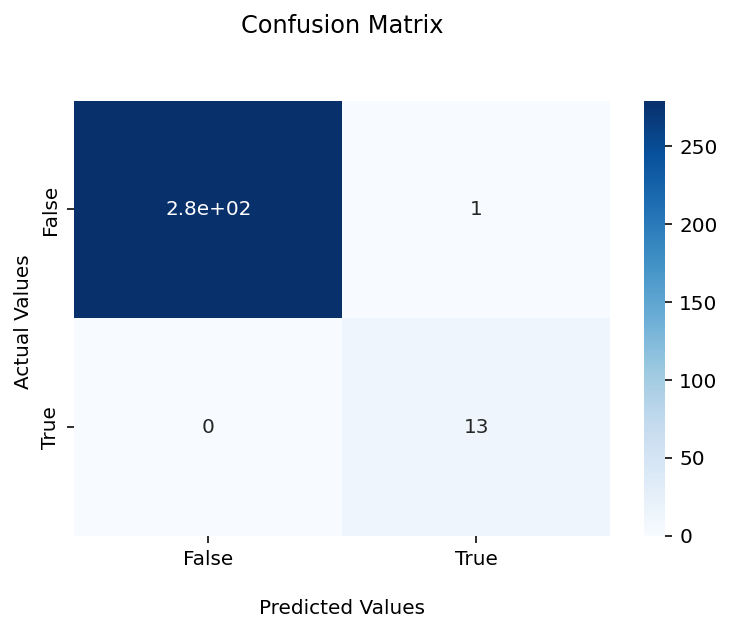

array([[279,   1],
       [  0,  13]])

In [195]:
training.plot_conf_matrix(y_preds_class,y_actual_class)